Clustering of countries
- 1.Data understanding and cleaning
- 2.Data Preparation
- 3.Modelling

In [1]:
# import all necessary libraries
import pandas as pd,numpy as np

# for visualisation
import matplotlib.pyplot as plt,seaborn as sns 
import plotly.express as px

# for scaling 
from sklearn.preprocessing import StandardScaler

# to perform kmeans clustering
from sklearn.cluster import KMeans

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

 Data Understanding

In [3]:
# let's read the data set
cn_data = pd.read_csv("Countries-dataset.csv")

In [4]:
# let's see the top 5 rows 
cn_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
# dimensions of the dataset
print(cn_data.shape)
print(cn_data.size)

(167, 10)
1670


In [6]:
# checking numerical columns using statistics
cn_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [7]:
# info 
cn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# let's check null values
cn_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
cn_data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [10]:
# plotting bar chart to see the child mortality rate all over the country
fig = px.bar(cn_data.sort_values('child_mort', ascending=False),
             x='country',
             y='child_mort',text='country',color ='country')

fig.update_traces(hovertemplate = '<b>%{text}</b><br> Child Mortality Rate :%{y:.2f}')
fig.update_layout(title ='COUNTRY WISE CHILD MORTALITY RATE',
                  xaxis_title = 'Country',
                 yaxis_title ='Child Mortality rate')
fig.show()

In [11]:
fig_3 = px.bar(cn_data.sort_values('exports',ascending = False) ,
           x ='country',y='exports',text ='country',color='country')
fig_3.update_traces(hovertemplate = "<b>%{text} :%{y:.2f}")
fig_3.update_layout(title ='Country Wise Export',
                   xaxis_title = 'country',
                   yaxis_title ='export')
fig_3.show()

In [12]:
fig_4 = px.bar(cn_data.sort_values('health',ascending=False),
              x= 'country',y='health',text='country',color='country')
fig_4.update_traces(hovertemplate = '<b>%{text}:%{y:.2f}')
fig_4.update_layout(title = 'Country wise Health',
                   xaxis_title = 'country',
                   yaxis_title ='Health')
fig_4.show()

In [13]:
fig_5 = px.bar(cn_data.sort_values('imports',ascending = False),x ='country',y='imports',color='country',
              text ='country')
fig_5.update_traces(hovertemplate = '<b>5{text}:%{y:.2f}')
fig_5.update_layout(title ='Country Wise Imports',xaxis_title = 'Country',yaxis_title = 'Import')
fig_5.show()

In [14]:
fig_6 = px.bar(cn_data.sort_values('income',ascending = False),x ='country',y='income',color='country',
              text ='country')
fig_6.update_traces(hovertemplate = '<b>5{text}:%{y:.2f}')
fig_6.update_layout(title ='Country Wise Income',xaxis_title = 'Country',yaxis_title = 'Income')
fig_6.show()

In [15]:
fig_7 = px.bar(cn_data.sort_values('inflation',ascending = False),x ='country',y='inflation',color='country',
              text ='country')
fig_7.update_traces(hovertemplate = '<b>5{text}:%{y:.2f}')
fig_7.update_layout(title ='Country Wise Inflation',xaxis_title = 'Country',yaxis_title = 'inflation')
fig_7.show()

In [16]:
fig_8 = px.bar(cn_data.sort_values('life_expec',ascending = False),x ='country',y='life_expec',color='country',
              text ='country')
fig_8.update_traces(hovertemplate = '<b>5{text}:%{y:.2f}')
fig_8.update_layout(title ='Country Wise  Life Expectency',xaxis_title = 'Country',yaxis_title = 'Life Expectency')
fig_8.show()

In [17]:
fig_9 = px.bar(cn_data.sort_values('total_fer',ascending = False),x ='country',y='total_fer',color='country',
              text ='country')
fig_9.update_traces(hovertemplate = '<b>5{text}:%{y:.2f}')
fig_9.update_layout(title ='Country Wise Fertility',xaxis_title = 'Country',yaxis_title = 'Fertility')
fig_9.show()

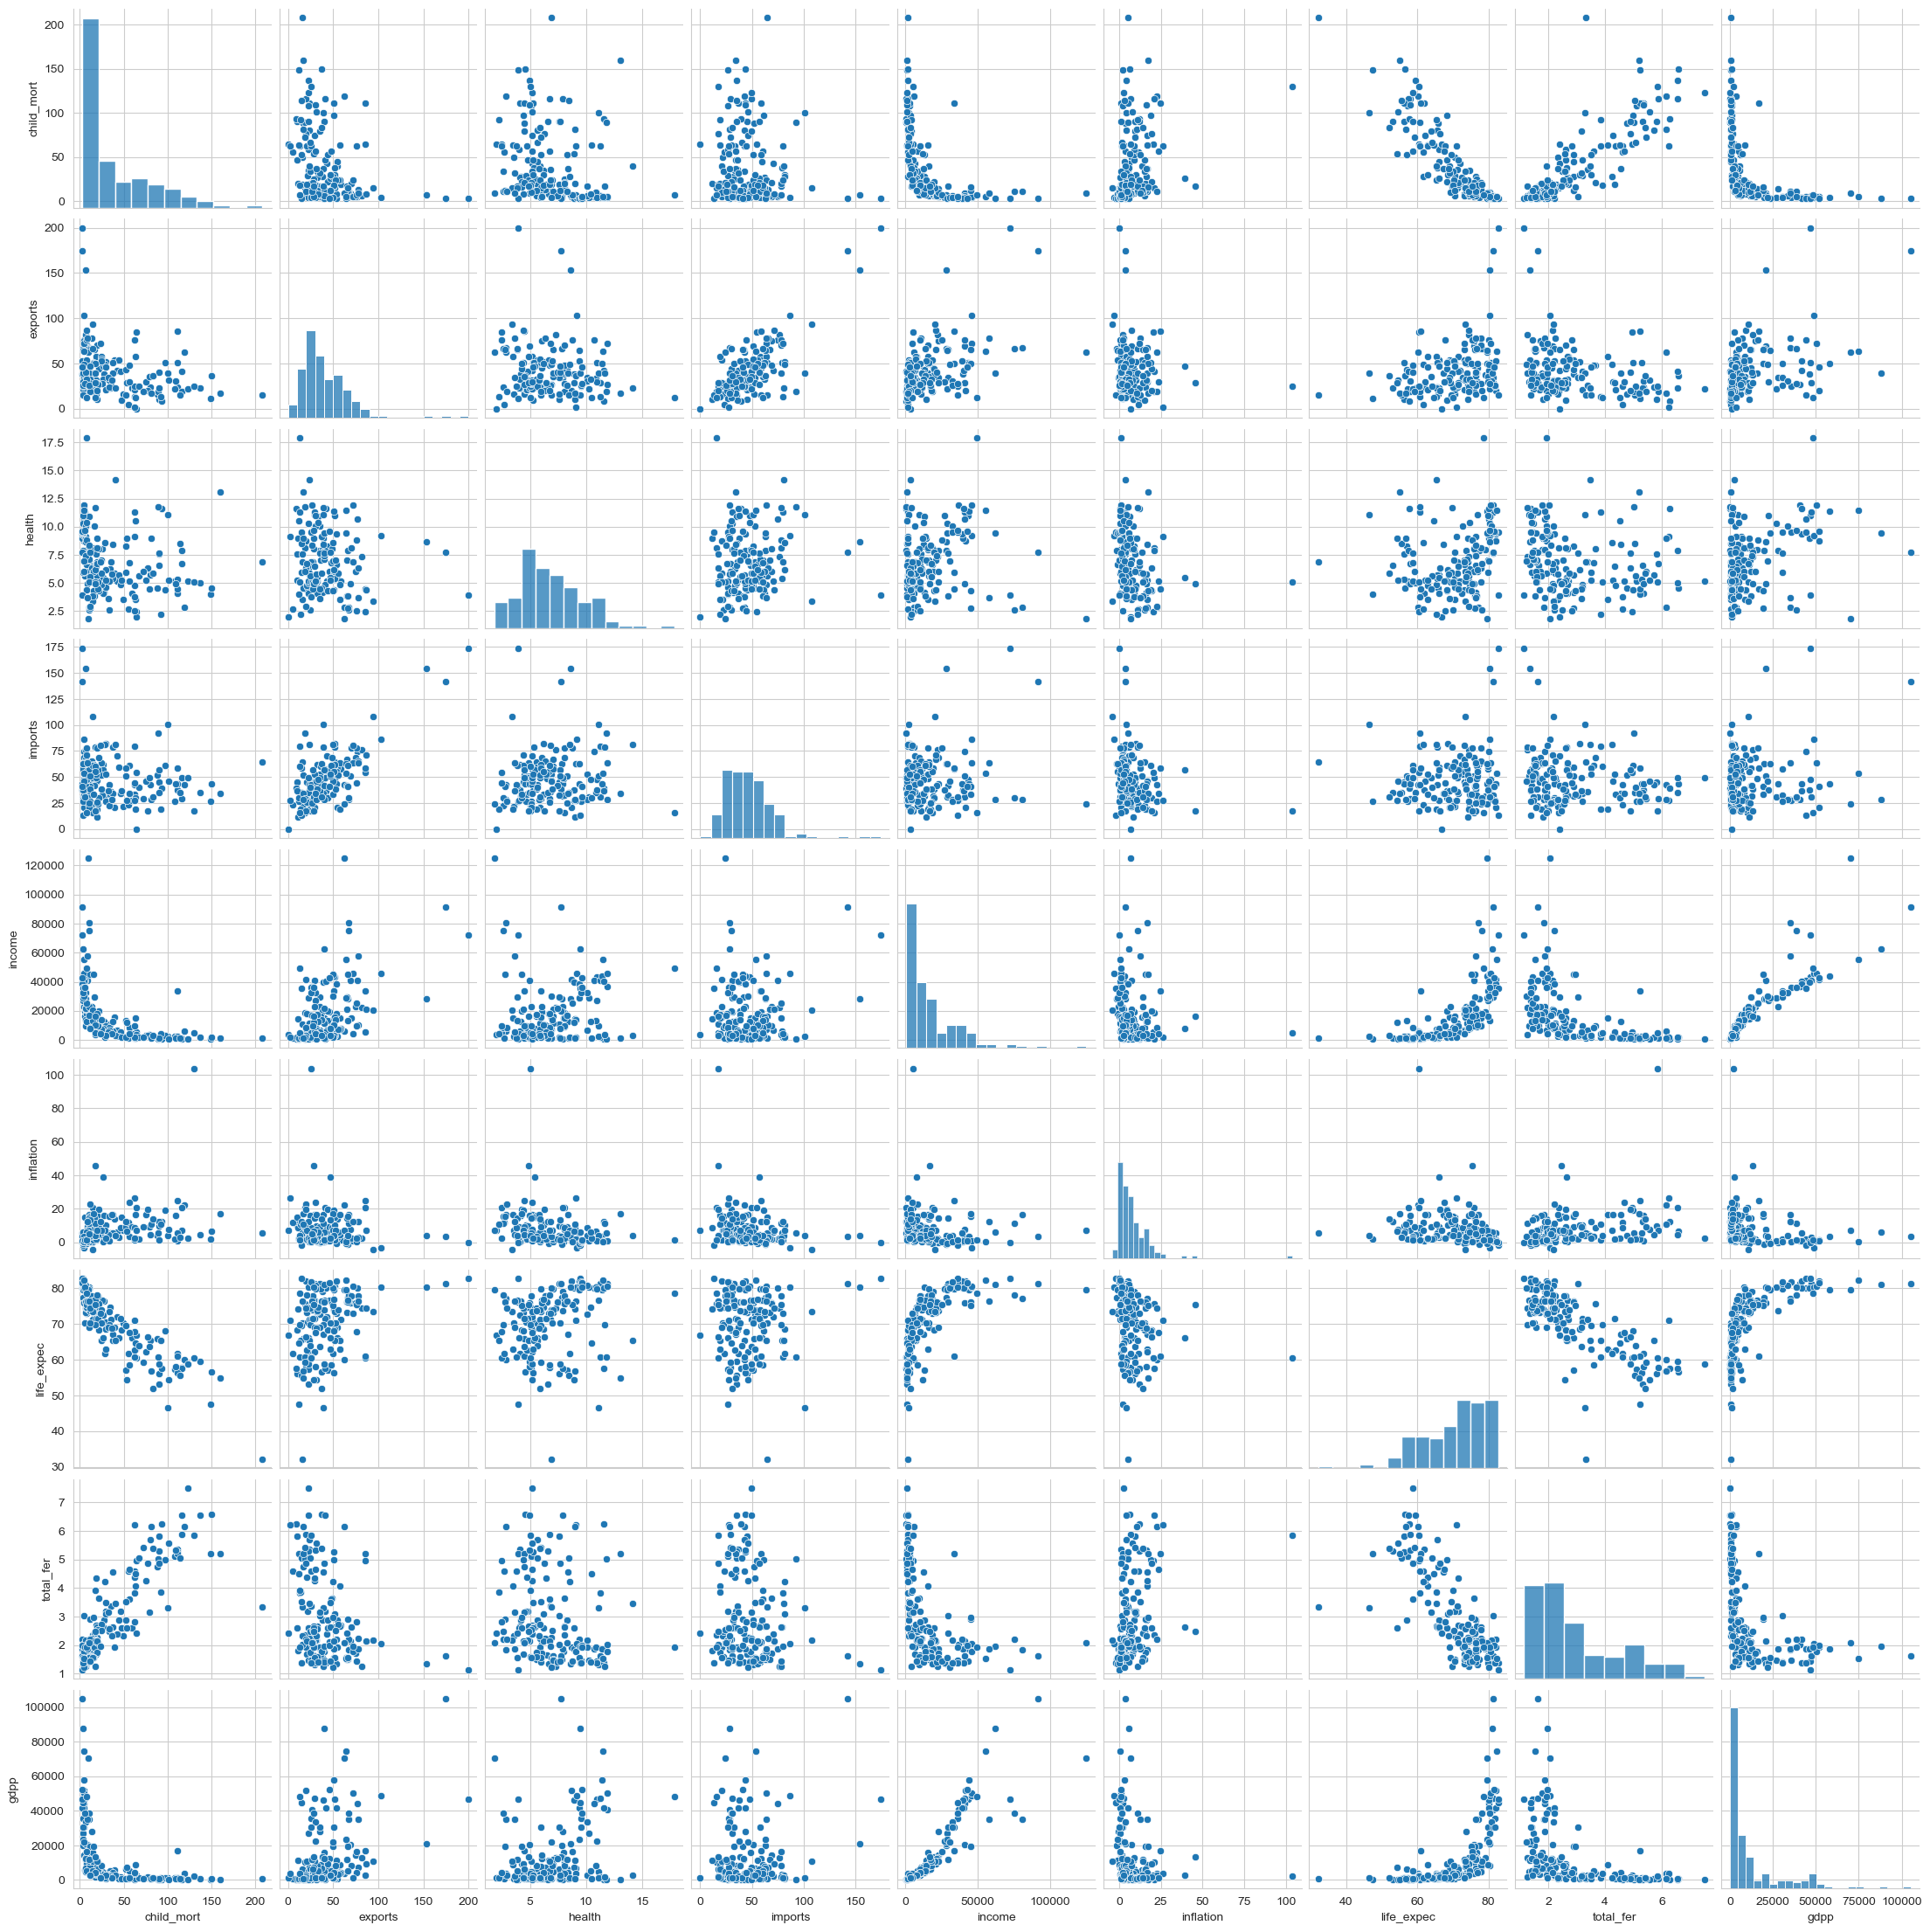

In [18]:
# Pairplot
sns.pairplot(cn_data)

<Axes: >

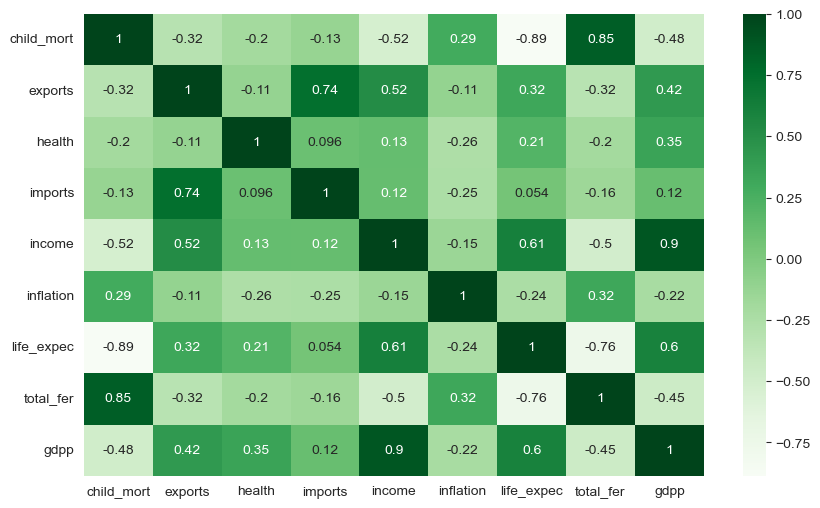

In [19]:
# Correlation heatmap
plt.figure(figsize = [10,6])
sns.heatmap(cn_data.corr(),annot=True , cmap = 'Greens')

In [20]:
# Converting exports ,imports and health from % to actual values
cn_data['exports'] = cn_data['exports']*cn_data['gdpp']/100
cn_data['health'] = cn_data['health']*cn_data['gdpp']/100
cn_data['imports'] = cn_data['imports']*cn_data['gdpp']/100
cn_data.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

Outlier Treatment

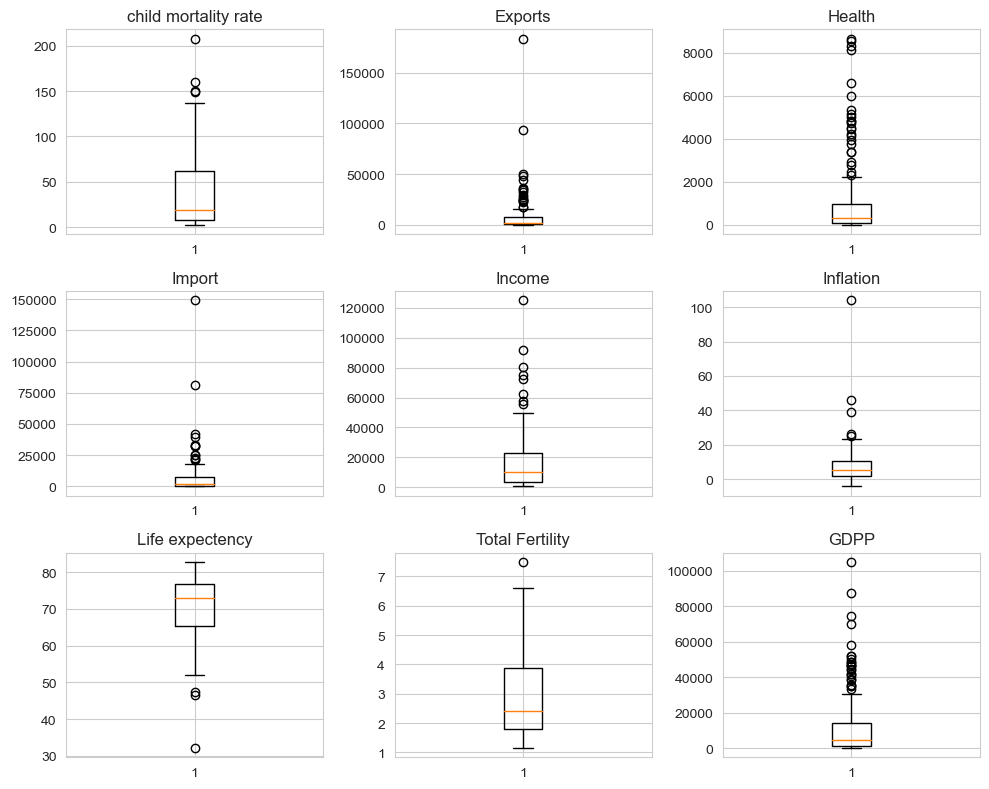

In [21]:
# boxplot
plt.figure(figsize=[10,8])
plt.subplot(3,3,1)
plt.boxplot(cn_data['child_mort'])
plt.title('child mortality rate')

plt.subplot(3,3,2)
plt.boxplot(cn_data['exports'])
plt.title('Exports')

plt.subplot(3,3,3)
plt.boxplot(cn_data['health'])
plt.title('Health')

plt.subplot(3,3,4)
plt.boxplot(cn_data['imports'])
plt.title('Import')

plt.subplot(3,3,5)
plt.boxplot(cn_data['income'])
plt.title('Income')

plt.subplot(3,3,6)
plt.boxplot(cn_data['inflation'])
plt.title('Inflation')

plt.subplot(3,3,7)
plt.boxplot(cn_data['life_expec'])
plt.title('Life expectency')

plt.subplot(3,3,8)
plt.boxplot(cn_data['total_fer'])
plt.title('Total Fertility')

plt.subplot(3,3,9)
plt.boxplot(cn_data['gdpp'])
plt.title('GDPP')

plt.tight_layout()
plt.show()

In [22]:
# 99th percentile to cap
q_gdpp = cn_data['gdpp'].quantile(0.99)
q_income = cn_data['income'].quantile(0.99)
q_health = cn_data['health'].quantile(0.99)
q_inflation = cn_data['inflation'].quantile(0.99)
q_exports = cn_data['exports'].quantile(0.99)
q_imports = cn_data['imports'].quantile(0.99)
q_total_fer = cn_data['total_fer'].quantile(0.99)

In [23]:
cn_data['gdpp'][cn_data['gdpp']>q_gdpp]  = q_gdpp

cn_data['income'][cn_data['income']>q_income] = q_income

cn_data['health'][cn_data['health']>q_health] = q_health

cn_data['inflation'][cn_data['inflation']>q_inflation] = q_inflation

cn_data['exports'][cn_data['exports']>q_exports] = q_exports

cn_data['imports'][cn_data['imports']>q_imports] = q_imports

cn_data['total_fer'][cn_data['total_fer']>q_total_fer] = q_total_fer


In [24]:
cn_data.describe()

child_mort       exports       health       imports        income  \
count  167.000000    167.000000   167.000000    167.000000    167.000000   
mean    38.270060   6538.214776  1054.206622   5873.135222  16857.550898   
std     40.328931  11415.308590  1790.845342   9422.700869  17957.012855   
min      2.600000      1.076920    12.821200      0.651092    609.000000   
25%      8.250000    447.140000    78.535500    640.215000   3355.000000   
50%     19.300000   1777.440000   321.886000   2045.580000   9960.000000   
75%     62.100000   7278.000000   976.940000   7719.600000  22800.000000   
max    208.000000  64794.260000  8410.330400  55371.390000  84374.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     7.380970   70.555689    2.942259  12756.826347  
std      7.793224    8.893172    1.498340  17430.208938  
min     -4.210000   32.100000    1.150000    231.000000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
max     41.478000   82.800000    6.563600  79088.000000

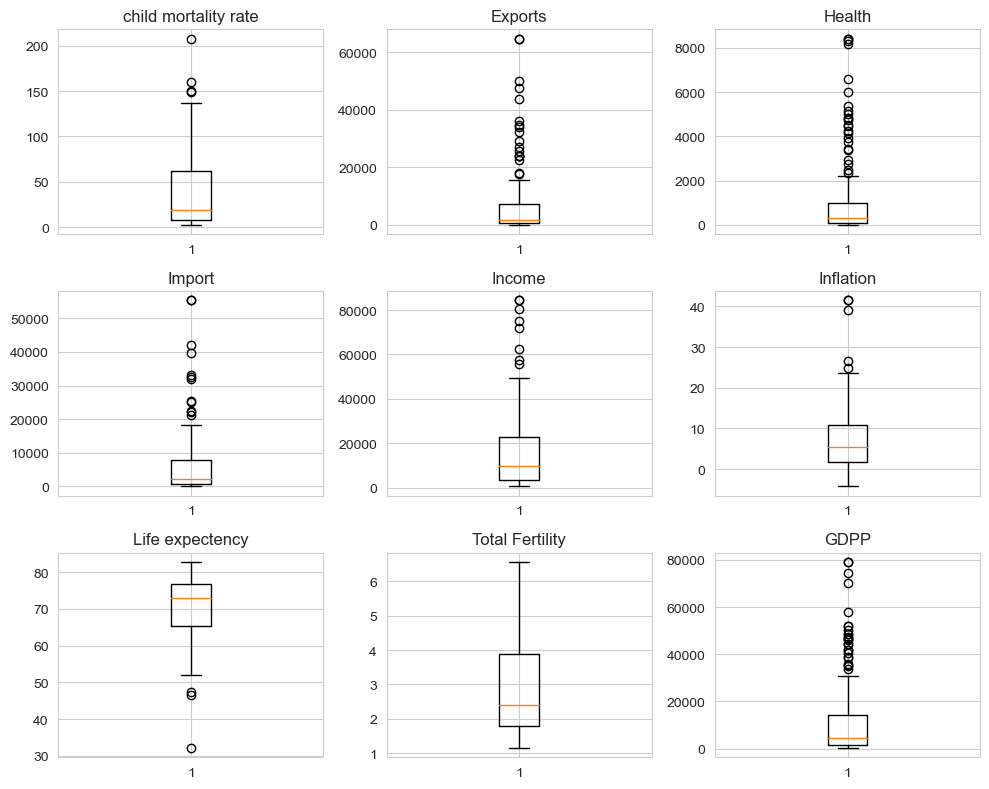

In [25]:
# after doing capping 
plt.figure(figsize=[10,8])
plt.subplot(3,3,1)
plt.boxplot(cn_data['child_mort'])
plt.title('child mortality rate')

plt.subplot(3,3,2)
plt.boxplot(cn_data['exports'])
plt.title('Exports')

plt.subplot(3,3,3)
plt.boxplot(cn_data['health'])
plt.title('Health')

plt.subplot(3,3,4)
plt.boxplot(cn_data['imports'])
plt.title('Import')

plt.subplot(3,3,5)
plt.boxplot(cn_data['income'])
plt.title('Income')

plt.subplot(3,3,6)
plt.boxplot(cn_data['inflation'])
plt.title('Inflation')

plt.subplot(3,3,7)
plt.boxplot(cn_data['life_expec'])
plt.title('Life expectency')

plt.subplot(3,3,8)
plt.boxplot(cn_data['total_fer'])
plt.title('Total Fertility')

plt.subplot(3,3,9)
plt.boxplot(cn_data['gdpp'])
plt.title('GDPP')

plt.tight_layout()
plt.show()

we still have outliers but we won't remove them.
Scaling

In [26]:
# scaling
scaler =StandardScaler()

In [27]:
# extracting numeric columns
num = cn_data.drop(['country'] ,axis=1)
num

child_mort  exports    health   imports   income  inflation  life_expec  \
0          90.2    55.30   41.9174   248.297   1610.0      9.440        56.2   
1          16.6  1145.20  267.8950  1987.740   9930.0      4.490        76.3   
2          27.3  1712.64  185.9820  1400.440  12900.0     16.100        76.5   
3         119.0  2199.19  100.6050  1514.370   5900.0     22.400        60.1   
4          10.3  5551.00  735.6600  7185.800  19100.0      1.440        76.8   
..          ...      ...       ...       ...      ...        ...         ...   
162        29.2  1384.02  155.9250  1565.190   2950.0      2.620        63.0   
163        17.1  3847.50  662.8500  2376.000  16500.0     41.478        75.4   
164        23.3   943.20   89.6040  1050.620   4490.0     12.100        73.1   
165        56.3   393.00   67.8580   450.640   4480.0     23.600        67.5   
166        83.1   540.20   85.9940   451.140   3280.0     14.000        52.0   

     total_fer     gdpp  
0         5.82    553.0  
1         1.65   4090.0  
2         2.89   4460.0  
3         6.16   3530.0  
4         2.13  12200.0  
..         ...      ...  
162       3.50   2970.0  
163       2.47  13500.0  
164       1.95   1310.0  
165       4.67   1310.0  
166       5.40   1460.0  

[167 rows x 9 columns]

In [28]:
cn_data_scaled = scaler.fit_transform(num)
cn_data_scaled

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.64524315, -0.6500669 ]])

In [29]:
# converting numpy array into data frame 
cn_data_scaled = pd.DataFrame(cn_data_scaled)
cn_data_scaled.columns = [num]
cn_data_scaled.head()

child_mort   exports    health   imports    income inflation life_expec  \
0   1.291532 -0.569622 -0.566958 -0.598741 -0.851668  0.265002  -1.619092   
1  -0.538949 -0.473858 -0.440393 -0.413584 -0.386946 -0.372075   0.647866   
2  -0.272833 -0.424000 -0.486271 -0.476100 -0.221053  1.122161   0.670423   
3   2.007808 -0.381249 -0.534088 -0.463973 -0.612045  1.932987  -1.179234   
4  -0.695634 -0.086742 -0.178410  0.139728  0.125254 -0.764618   0.704258   

  total_fer      gdpp  
0  1.926396 -0.702259  
1 -0.865054 -0.498726  
2 -0.034983 -0.477434  
3  2.153997 -0.530950  
4 -0.543736 -0.032042

 K-means Clustering
 Hopkins Statistics

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    neighbors = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = neighbors.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = neighbors.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(cn_data_scaled)

0.8656175332019295

In [32]:
# finding the optimum k value using elbow curve
ssd =[]
n = [2,3,4,5,6,7,8,9,10]
for cluster_num in n:
    kmeans = KMeans(n_clusters =cluster_num ,max_iter=50)
    kmeans.fit(cn_data_scaled)
    ssd.append(kmeans.inertia_)
ssd    

[844.8641721583855,
 556.7105558330777,
 443.45324987247915,
 383.59555613802024,
 342.63962773167475,
 310.4682612922713,
 280.8224589353863,
 250.22924444514507,
 231.83923265111355]

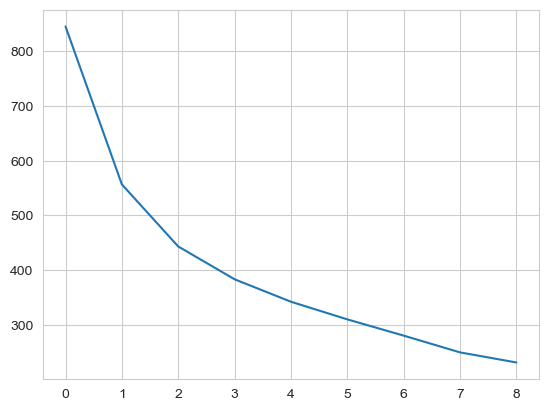

In [33]:
# Elbow curve,plot ssd for n clusters
plt.plot(ssd)
plt.show()

In [34]:
# import sihouette score
from sklearn.metrics import silhouette_score

In [35]:
# finding optimum k using silhouette method
n = [2,3,4,5,6,7,8,9,10]
ssd =[]
for num_clusters in n:
    kmeans =KMeans(n_clusters = num_clusters ,max_iter =50)
    kmeans.fit(cn_data_scaled)
    score = silhouette_score(cn_data_scaled ,kmeans.labels_)
    ssd.append([num_clusters ,score])
    print("for n_clusters = {0},the silhouette score is :{1}".format(num_clusters,score))

for n_clusters = 2,the silhouette score is :0.46945658285687586
for n_clusters = 3,the silhouette score is :0.4035259981391569
for n_clusters = 4,the silhouette score is :0.3919682996098615
for n_clusters = 5,the silhouette score is :0.3670235068139524
for n_clusters = 6,the silhouette score is :0.29356444068117105
for n_clusters = 7,the silhouette score is :0.28996398674645635
for n_clusters = 8,the silhouette score is :0.2843508208388255
for n_clusters = 9,the silhouette score is :0.307807976290102
for n_clusters = 10,the silhouette score is :0.29290855728481446


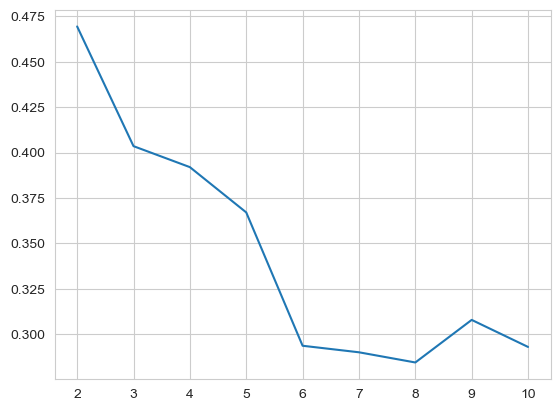

In [36]:
# line plot
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [58]:
# lets take clusters =3
kmeans_3 = KMeans(n_clusters = 3,max_iter=50)
kmeans_3.fit(cn_data_scaled)

KMeans(max_iter=50, n_clusters=3)

In [38]:
kmeans_3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [59]:
print(f'Silhouette Score(n=2): {silhouette_score(cn_data_scaled, kmeans_3.labels_)}')

Silhouette Score(n=2): 0.4035259981391569


In [39]:
# adding cluster id back to the country dataframe
cn_data['cluster_label'] = kmeans_3.labels_
cn_data.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_label  
0       9.44        56.2       5.82    553.0              2  
1       4.49        76.3       1.65   4090.0              0  
2      16.10        76.5       2.89   4460.0              0  
3      22.40        60.1       6.16   3530.0              2  
4       1.44        76.8       2.13  12200.0              0

In [40]:
# country count per cluster(group)
cn_data.cluster_label.value_counts()

0    90
2    48
1    29
Name: cluster_label, dtype: int64

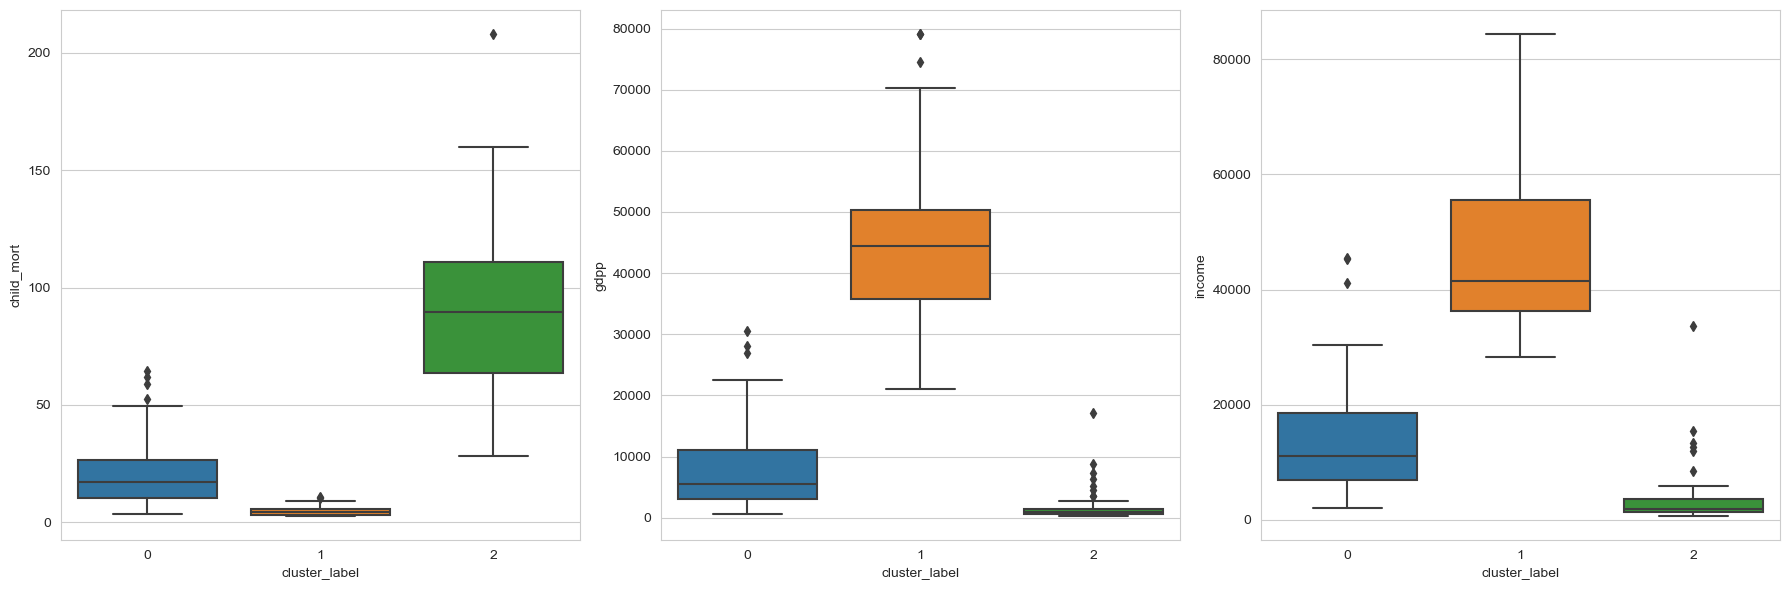

In [41]:
# box plot 
# child mortality
plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
sns.boxplot(x='cluster_label',y ='child_mort',data=cn_data)

# gdpp
plt.subplot(1,3,2)
sns.boxplot(x='cluster_label',y='gdpp',data = cn_data)
# income
plt.subplot(1,3,3)
sns.boxplot(x='cluster_label',y='income',data=cn_data)

plt.tight_layout()
plt.show()

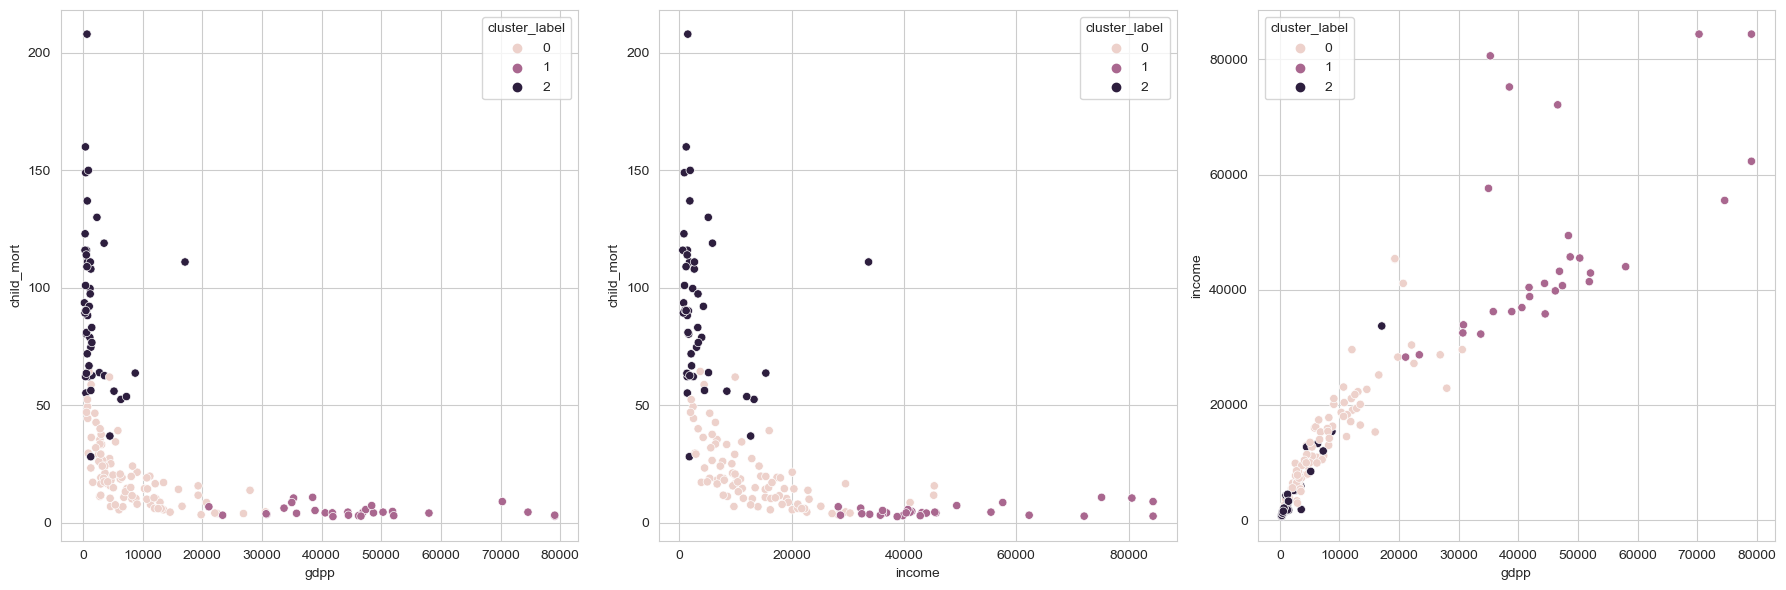

In [42]:
# scatter plot 
plt.figure(figsize=[18,6])

# child mortatlity and gdpp
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp' , y='child_mort',data = cn_data ,hue = 'cluster_label')

# child mortality and income
plt.subplot(1,3,2)
sns.scatterplot(x='income' , y='child_mort',data = cn_data ,hue = 'cluster_label')

# income and gdpp
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp' , y='income',data = cn_data ,hue = 'cluster_label')

plt.tight_layout()
plt.show()

In [43]:
# Let's see the countries in cluster 0 ,this are developed countries
cn_data[cn_data['cluster_label']==0]

country  child_mort  exports   health  imports   income  \
1                Albania        16.6  1145.20  267.895  1987.74   9930.0   
2                Algeria        27.3  1712.64  185.982  1400.44  12900.0   
4    Antigua and Barbuda        10.3  5551.00  735.660  7185.80  19100.0   
5              Argentina        14.5  1946.70  834.300  1648.00  18700.0   
6                Armenia        18.1   669.76  141.680  1458.66   6700.0   
..                   ...         ...      ...      ...      ...      ...   
160              Uruguay        10.6  3129.70  993.650  3022.60  17100.0   
161           Uzbekistan        36.3   437.46   80.178   393.30   4240.0   
162              Vanuatu        29.2  1384.02  155.925  1565.19   2950.0   
163            Venezuela        17.1  3847.50  662.850  2376.00  16500.0   
164              Vietnam        23.3   943.20   89.604  1050.62   4490.0   

     inflation  life_expec  total_fer     gdpp  cluster_label  
1        4.490        76.3       1.65   4090.0              0  
2       16.100        76.5       2.89   4460.0              0  
4        1.440        76.8       2.13  12200.0              0  
5       20.900        75.8       2.37  10300.0              0  
6        7.770        73.3       1.69   3220.0              0  
..         ...         ...        ...      ...            ...  
160      4.910        76.4       2.08  11900.0              0  
161     16.500        68.8       2.34   1380.0              0  
162      2.620        63.0       3.50   2970.0              0  
163     41.478        75.4       2.47  13500.0              0  
164     12.100        73.1       1.95   1310.0              0  

[90 rows x 11 columns]

In [44]:
# cluster 2,let's see underdeveloped countries
cn_data[cn_data['cluster_label']==2]

country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040   1498.780   
40              Cote d'Ivoire       111.0    617.3200   64.6600    528.260   
49          Equatorial Guinea       111.0  14671.8000  766.0800  10071.900   
50                    Eritrea        55.2     23.0878   12.8212    112.306   
55                      Gabon        63.7   5048.7500  306.2500   1653.750   
56                     Gambia        80.3    133.7560   31.9778    239.974   
59                      Ghana        74.7    386.4500   68.3820    601.290   
63                     Guinea       109.0    196.3440   31.9464    279.936   
64              Guinea-Bissau       114.0     81.5030   46.4950    192.544   
66                      Haiti       208.0    101.2860   45.7442    428.314   
72                       Iraq        36.9   1773.0000  378.4500   1534.500   
80                      Kenya        62.2    200.1690   45.9325    324.912   
81                   Kiribati        62.7    198.1700  168.3700   1190.510   
84                        Lao        78.9    403.5600   50.9580    562.020   
87                    Lesotho        99.7    460.9800  129.8700   1181.700   
88                    Liberia        89.3     62.4570   38.5860    302.802   
93                 Madagascar        62.2    103.2500   15.5701    177.590   
94                     Malawi        90.5    104.6520   30.2481    160.191   
97                       Mali       137.0    161.4240   35.2584    248.508   
99                 Mauritania        97.4    608.4000   52.9200    734.400   
106                Mozambique       101.0    131.9850   21.8299    193.578   
108                   Namibia        56.0   2480.8200  351.8820   3150.330   
112                     Niger       123.0     77.2560   17.9568    170.868   
113                   Nigeria       130.0    589.4900  118.1310    405.420   
116                  Pakistan        92.1    140.4000   22.8800    201.760   
126                    Rwanda        63.6     67.5600   59.1150    168.900   
129                   Senegal        66.8    249.0000   56.6000    403.000   
132              Sierra Leone       160.0     67.0320   52.2690    137.655   
136           Solomon Islands        28.1    635.9700  110.2950   1047.480   
137              South Africa        53.7   2082.0800  650.8320   1994.720   
142                     Sudan        76.7    291.5600   93.5360    254.560   
147                  Tanzania        71.9    131.2740   42.1902    204.282   
149               Timor-Leste        62.6     79.2000  328.3200   1000.800   
150                      Togo        90.3    196.1760   37.3320    279.624   
155                    Uganda        81.0    101.7450   53.6095    170.170   
165                     Yemen        56.3    393.0000   67.8580    450.640   
166                    Zambia        83.1    540.2000   85.9940    451.140   

      income  inflation  life_expec  total_fer     gdpp  cluster_label  
0     1610.0      9.440        56.2     5.8200    553.0              2  
3     5900.0     22.400        60.1     6.1600   3530

In [45]:
# let's see cluster 1,developing countries
cn_data[cn_data['cluster_label']==1]

country  child_mort   exports     health   imports   income  \
7               Australia         4.8  10276.20  4530.8700  10847.10  41400.0   
8                 Austria         4.3  24059.70  5159.0000  22418.20  43200.0   
15                Belgium         4.5  33921.60  4750.8000  33166.80  41100.0   
23                 Brunei        10.5  23792.20  1002.5200   9884.00  80600.0   
29                 Canada         5.6  13793.40  5356.2000  14694.00  40700.0   
42                 Cyprus         3.6  15461.60  1838.7600  17710.00  33900.0   
44                Denmark         4.1  29290.00  6612.0000  25288.00  44000.0   
53                Finland         3.0  17879.40  4134.9000  17278.80  39800.0   
54                 France         4.2  10880.80  4831.4000  11408.60  36900.0   
58                Germany         4.2  17681.40  4848.8000  15507.80  40400.0   
68                Iceland         2.6  22374.60  3938.6000  18142.70  38800.0   
73                Ireland         4.2  50161.00  4475.5300  42125.50  45700.0   
75                  Italy         4.0   9021.60  3411.7400   9737.60  36200.0   
77                  Japan         3.2   6675.00  4223.0500   6052.00  35800.0   
82                 Kuwait        10.8  25679.50  1012.5500  11704.00  75200.0   
91             Luxembourg         2.8  64794.26  8158.5000  55371.39  84374.0   
98                  Malta         6.8  32283.00  1825.1500  32494.00  28300.0   
110           Netherlands         4.5  36216.00  5985.7000  31990.80  45500.0   
111           New Zealand         6.2  10211.10  3403.7000   9436.00  32300.0   
114                Norway         3.2  34856.60  8323.4400  25023.00  62300.0   
123                 Qatar         9.0  43796.90  1272.4300  16731.40  84374.0   
133             Singapore         2.8  64794.26  1845.3600  55371.39  72100.0   
135              Slovenia         3.2  15046.20  2201.9400  14718.60  28700.0   
139                 Spain         3.8   7828.50  2928.7800   8227.60  32500.0   
144                Sweden         3.0  24070.20  5017.2300  21204.70  42900.0   
145           Switzerland         4.5  47744.00  8410.3304  39761.80  55500.0   
157  United Arab Emirates         8.6  27195.00  1281.0000  22260.00  57600.0   
158        United Kingdom         5.2  10969.80  3749.9600  11981.20  36200.0   
159         United States         7.3   6001.60  8410.3304   7647.20  49400.0   

     inflation  life_expec  total_fer     gdpp  cluster_label  
7        1.160        82.0       1.93  51900.0              1  
8        0.873        80.5       1.44  46900.0              1  
15       1.880        80.0       1.86  44400.0              1  
23      16.700        77.1       1.84  35300.0              1  
29       2.870        81.3       1.63  47400.0              1  
42       2.010        79.9       1.42  30800.0              1  
44       3.220        79.5       1.87  58000.0              1  
53       0.351        80.0       1.87  46200.0              1  
54       1.050        81.4       2.03  40600.0              1  
58       0.758        80.1       1.39  41800.0              1  
68       5.470        82.0       2.20  41900.0              1  
73      -3.220        80.4       2.05  48700.0              1  
75       0.319        81.7       1.46  35800.0              1  
77      -1.900        82.8       1.39  44500.0              1  
82      11.200        78.2       2.21  38500.0              1  
91       3.620        81.3       1.63  79088.0              1  
98       3.830        80.3       1.36  21100.0              1  
110      0.848        80.7       1.79  50300.0              1  
111      3.730        80.9       2.17  33700.0              1  
114      5.950        81.0       1.95  79088.0              1  
123      6.980        79.5       2.07  70300.0              1  
133     -0.046        82.7       1.15  46600.0              1  
135     -0.987        79.5       1.57  23400.0              1  
139      0.160        81.9       1.37  30700.0     

 K-means cluster Model Interpretation



In [46]:
# grouping k means labels
cn_data_analysis = cn_data.groupby(['cluster_label']).mean()
cn_data_analysis

child_mort       exports       health       imports  \
cluster_label                                                        
0               20.547778   3477.015539   528.894338   3588.133568   
1                4.982759  25405.359310  4239.330028  21316.695862   
2               91.610417    879.063521   114.821765    827.028771   

                     income  inflation  life_expec  total_fer          gdpp  
cluster_label                                                                
0              13804.333333   7.110944   73.393333   2.242444   7808.577778  
1              47784.413793   2.876690   80.479310   1.754138  46068.137931  
2               3897.354167  10.608604   59.239583   4.972233   1909.208333

In [47]:
# Creating a new feature for count of observations in each cluster
cn_data_analysis['Observation'] = cn_data.groupby('cluster_label')['country'].count()
cn_data_analysis

child_mort       exports       health       imports  \
cluster_label                                                        
0               20.547778   3477.015539   528.894338   3588.133568   
1                4.982759  25405.359310  4239.330028  21316.695862   
2               91.610417    879.063521   114.821765    827.028771   

                     income  inflation  life_expec  total_fer          gdpp  \
cluster_label                                                                 
0              13804.333333   7.110944   73.393333   2.242444   7808.577778   
1              47784.413793   2.876690   80.479310   1.754138  46068.137931   
2               3897.354167  10.608604   59.239583   4.972233   1909.208333   

               Observation  
cluster_label               
0                       90  
1                       29  
2                       48

In [48]:
# proportion of observations in each cluster

cn_data_analysis['Observation']/cn_data_analysis['Observation'].sum()

cluster_label
0    0.538922
1    0.173653
2    0.287425
Name: Observation, dtype: float64

In [49]:
# creating a new column to see the proportion of observations in each cluster

cn_data_analysis['Proportion']= round(cn_data_analysis['Observation']/cn_data_analysis['Observation'].sum(),2)*100
cn_data_analysis

child_mort       exports       health       imports  \
cluster_label                                                        
0               20.547778   3477.015539   528.894338   3588.133568   
1                4.982759  25405.359310  4239.330028  21316.695862   
2               91.610417    879.063521   114.821765    827.028771   

                     income  inflation  life_expec  total_fer          gdpp  \
cluster_label                                                                 
0              13804.333333   7.110944   73.393333   2.242444   7808.577778   
1              47784.413793   2.876690   80.479310   1.754138  46068.137931   
2               3897.354167  10.608604   59.239583   4.972233   1909.208333   

               Observation  Proportion  
cluster_label                           
0                       90        54.0  
1                       29        17.0  
2                       48        29.0

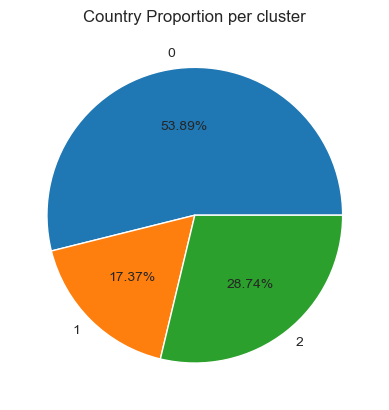

In [50]:
# Country proportion per cluster
plt.pie(cn_data_analysis['Observation'],labels = cn_data_analysis.index , autopct ='%.2f%%')
plt.title('Country Proportion per cluster')
plt.show()

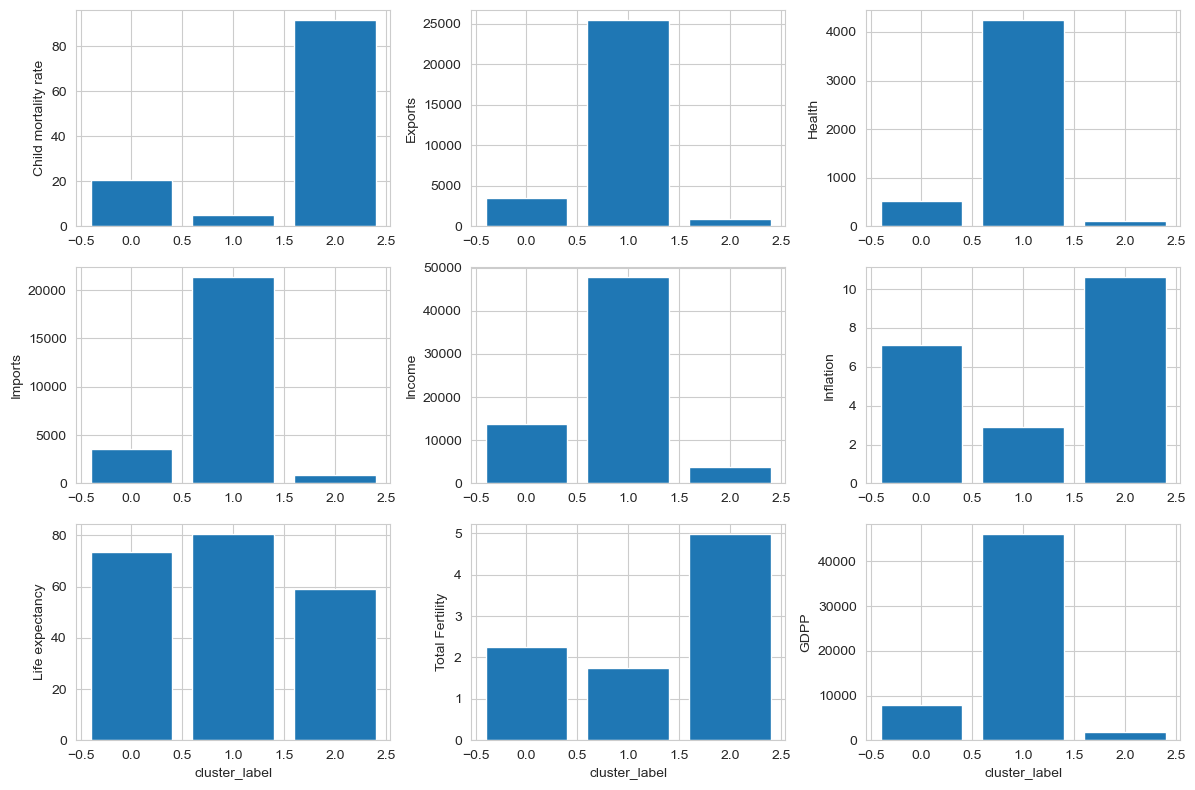

In [51]:
plt.figure(figsize=[12,8])
plt.subplot(3,3,1)
plt.bar(cn_data_analysis.index, cn_data_analysis['child_mort'])
plt.ylabel('Child mortality rate')

plt.subplot(3,3,2)
plt.bar(cn_data_analysis.index ,cn_data_analysis['exports'])
plt.ylabel('Exports')

plt.subplot(3,3,3)
plt.bar(cn_data_analysis.index , cn_data_analysis['health'])
plt.ylabel('Health')

plt.subplot(3,3,4)
plt.bar(cn_data_analysis.index ,cn_data_analysis['imports'])
plt.ylabel('Imports')

plt.subplot(3,3,5)
plt.bar(cn_data_analysis.index , cn_data_analysis['income'])
plt.ylabel('Income')

plt.subplot(3,3,6)
plt.bar(cn_data_analysis.index ,cn_data_analysis['inflation'])
plt.ylabel('Inflation')

plt.subplot(3,3,7)
plt.bar(cn_data_analysis.index , cn_data_analysis['life_expec'])
plt.xlabel('cluster_label')
plt.ylabel('Life expectancy')

plt.subplot(3,3,8)
plt.bar(cn_data_analysis.index , cn_data_analysis['total_fer'])
plt.xlabel('cluster_label')
plt.ylabel('Total Fertility')

plt.subplot(3,3,9)
plt.bar(cn_data_analysis.index , cn_data_analysis['gdpp'])
plt.xlabel('cluster_label')
plt.ylabel('GDPP')

plt.tight_layout()
plt.show()

In [52]:
cn_data[cn_data['cluster_label']==2]

country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040   1498.780   
40              Cote d'Ivoire       111.0    617.3200   64.6600    528.260   
49          Equatorial Guinea       111.0  14671.8000  766.0800  10071.900   
50                    Eritrea        55.2     23.0878   12.8212    112.306   
55                      Gabon        63.7   5048.7500  306.2500   1653.750   
56                     Gambia        80.3    133.7560   31.9778    239.974   
59                      Ghana        74.7    386.4500   68.3820    601.290   
63                     Guinea       109.0    196.3440   31.9464    279.936   
64              Guinea-Bissau       114.0     81.5030   46.4950    192.544   
66                      Haiti       208.0    101.2860   45.7442    428.314   
72                       Iraq        36.9   1773.0000  378.4500   1534.500   
80                      Kenya        62.2    200.1690   45.9325    324.912   
81                   Kiribati        62.7    198.1700  168.3700   1190.510   
84                        Lao        78.9    403.5600   50.9580    562.020   
87                    Lesotho        99.7    460.9800  129.8700   1181.700   
88                    Liberia        89.3     62.4570   38.5860    302.802   
93                 Madagascar        62.2    103.2500   15.5701    177.590   
94                     Malawi        90.5    104.6520   30.2481    160.191   
97                       Mali       137.0    161.4240   35.2584    248.508   
99                 Mauritania        97.4    608.4000   52.9200    734.400   
106                Mozambique       101.0    131.9850   21.8299    193.578   
108                   Namibia        56.0   2480.8200  351.8820   3150.330   
112                     Niger       123.0     77.2560   17.9568    170.868   
113                   Nigeria       130.0    589.4900  118.1310    405.420   
116                  Pakistan        92.1    140.4000   22.8800    201.760   
126                    Rwanda        63.6     67.5600   59.1150    168.900   
129                   Senegal        66.8    249.0000   56.6000    403.000   
132              Sierra Leone       160.0     67.0320   52.2690    137.655   
136           Solomon Islands        28.1    635.9700  110.2950   1047.480   
137              South Africa        53.7   2082.0800  650.8320   1994.720   
142                     Sudan        76.7    291.5600   93.5360    254.560   
147                  Tanzania        71.9    131.2740   42.1902    204.282   
149               Timor-Leste        62.6     79.2000  328.3200   1000.800   
150                      Togo        90.3    196.1760   37.3320    279.624   
155                    Uganda        81.0    101.7450   53.6095    170.170   
165                     Yemen        56.3    393.0000   67.8580    450.640   
166                    Zambia        83.1    540.2000   85.9940    451.140   

      income  inflation  life_expec  total_fer     gdpp  cluster_label  
0     1610.0      9.440        56.2     5.8200    553.0              2  
3     5900.0     22.400        60.1     6.1600   3530

In [53]:
# let's bin cluster 2

cluster = cn_data[cn_data['cluster_label']==2]
cluster.sort_values(['child_mort','health','life_expec','gdpp','income','inflation','total_fer','exports','imports'],
                      ascending =[False ,True,True ,True ,True ,False ,False,True,False]).head(10)

country  child_mort   exports    health   imports  \
66                      Haiti       208.0   101.286   45.7442   428.314   
132              Sierra Leone       160.0    67.032   52.2690   137.655   
32                       Chad       150.0   330.096   40.6341   390.195   
31   Central African Republic       149.0    52.628   17.7508   118.190   
97                       Mali       137.0   161.424   35.2584   248.508   
113                   Nigeria       130.0   589.490  118.1310   405.420   
112                     Niger       123.0    77.256   17.9568   170.868   
3                      Angola       119.0  2199.190  100.6050  1514.370   
37           Congo, Dem. Rep.       116.0   137.274   26.4194   165.664   
25               Burkina Faso       116.0   110.400   38.7550   170.200   

     income  inflation  life_expec  total_fer    gdpp  cluster_label  
66   1500.0      5.450        32.1     3.3300   662.0              2  
132  1220.0     17.200        55.0     5.2000   399.0              2  
32   1930.0      6.390        56.5     6.5636   897.0              2  
31    888.0      2.010        47.5     5.2100   446.0              2  
97   1870.0      4.370        59.5     6.5500   708.0              2  
113  5150.0     41.478        60.5     5.8400  2330.0              2  
112   814.0      2.550        58.8     6.5636   348.0              2  
3    5900.0     22.400        60.1     6.1600  3530.0              2  
37    609.0     20.800        57.5     6.5400   334.0              2  
25   1430.0      6.810        57.9     5.8700   575.0              2

-

-